# US college admissions dataset: Further analysis

This supplements an [inverse optimization exercise](https://github.com/maxkapur/StudentPrefsRevOpt) uploaded in a separate repo.

In [37]:
using OneTest
using Random

using Plots, Plots.PlotMeasures
using HTTP
using DataFrames
ENV["COLUMNS"] = 120

using CSV
using StatsBase, Distributions

In [2]:
# invopt_results = HTTP.get("https://raw.githubusercontent.com/maxkapur/StudentPrefsRevOpt/main/results.csv").body |> CSV.File |> DataFrame
# Read in locally instead; this may also include the sigma param we calculate later on
invopt_results = CSV.File("./SchoolIncentives/results.csv") |> DataFrame

,name,demand,cutoff,yield,trueyield,preferability,rank,selectivity,selectivity_error
,String,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64
1,University of Arkansas at Pine Bluff,568,0.0,0.5,0.000754329,4.46923e-6,551,0.0,0.0
2,Delaware State University,1036,0.0,0.28,0.00137585,8.15163e-6,483,0.0,0.0
3,Wesley College,556,0.0,0.3,0.000738393,4.37481e-6,555,0.0,0.0
4,Edward Waters College,208,0.0,0.4,0.000276233,1.63662e-6,646,0.0,0.0
5,St Thomas University,210,0.0,0.63,0.000278889,1.65236e-6,644,0.0,0.0
6,Paine College,268,0.0,0.22,0.000355916,2.10872e-6,631,0.0,0.0
7,Savannah State University,1301,0.0,0.54,0.00172779,1.02367e-5,453,0.0,0.0
8,University of Hawaii-West Oahu,301,0.0,0.43,0.000399741,2.36838e-6,620,0.0,0.0
9,Calumet College of Saint Joseph,192,0.0,0.88,0.000254984,1.51073e-6,655,0.0,0.0


In [3]:
# For a performance improvement, use Float32 and constant market params.
T = Float32
const america = Market(log.(convert(Array{T}, invopt_results[!, :preferability])),
                       ones(T, size(invopt_results)[1]),
                       convert(Array{T}, invopt_results[!, :preferability]))
const america_p = convert(Array{T}, invopt_results[!, :cutoff])

677-element Vector{Float32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.92824626
 0.9307242
 0.9320209
 0.9338413
 0.9364359
 0.94189596
 0.94450414
 0.94896173
 0.95149153
 0.95263076
 0.9527485
 0.9590225

# Results plot

1. Harvard University
2. Yale University
3. University of Chicago
4. University of Pennsylvania
5. Northwestern University
6. Cornell University
7. Washington University in St Louis
8. Massachusetts Institute of Technology
9. Princeton University
10. Stanford University
11. Vanderbilt University
12. Columbia University in the City of New York
13. Duke University
14. University of Michigan-Ann Arbor
15. New York University
16. Northeastern University
17. Brown University
18. University of California-Berkeley
19. University of Southern California
20. Carnegie Mellon University

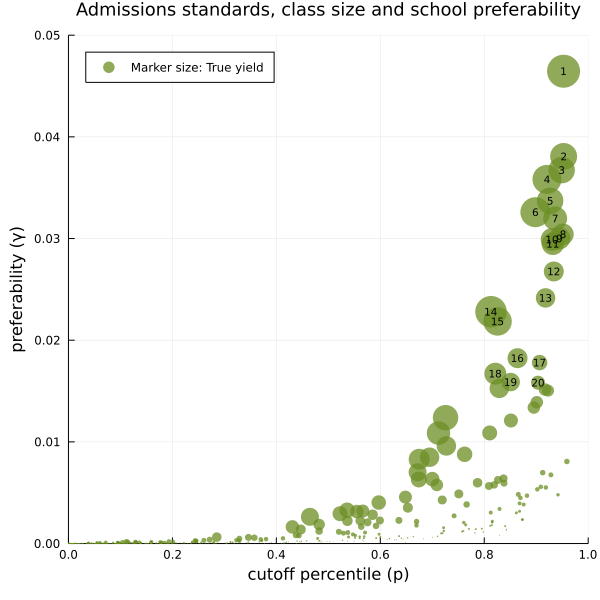

In [4]:
function plot_cutoff_gamma(stats::DataFrame)

    pl = plot(size=(600, 600), xlim=(0, 1), ylim=(0, 0.05),#1.1*maximum(stats[!, :preferability])),
              xlabel="cutoff percentile (p)", ylabel="preferability (γ)", legend=:topleft,
              title="Admissions standards, class size and school preferability", titlefontsize=12)

    scatter!(pl,
             stats[!, :cutoff],
             stats[!, :preferability],
             marker=:circle,
             ms=stats[!, :trueyield]*400,
             msw=0, msa=0,
             ma=.75,
             color=:olivedrab,
             label="Marker size: True yield")

    numsfont = text("").font
    numsfont.rotation = 0
    numsfont.halign = :hcenter
    numsfont.valign = :vcenter
    numsfont.pointsize = 7

    best = sortperm(stats[!, :preferability], rev=true)

    n = 20

    for i in 1:n
        annotate!(pl,
              [(stats[best[i], :cutoff], 
                stats[best[i], :preferability],
                text(i, numsfont))])
    end

    font = text("").font
    font.rotation = 0
    font.halign = :left
    font.valign = :top
    font.pointsize = 9

    key = join([string(i)*". "*stats[best[i], :name] for i in 1:n], '\n')
    # annotate!(pl, [(0.07, 0.043, text(key, font))])
    print(key)

    return pl
end

pl = plot_cutoff_gamma(invopt_results)

# savefig(pl, "paper/plots/US-cutoff-gamma.pdf")
# savefig(pl, "paper/plots/US-cutoff-gamma.png")

pl

In [5]:
# Just a helper fn to make the table in the text
function parser(x)
    if typeof(x)<:Vector{<:AbstractFloat}
        return round.(x, digits=4)
    elseif typeof(x)<:Vector{String}
        x = replace.(x, Pair("University", "U"))
#         x = replace.(x, Pair(" College", ""))
        return x
    else
        return x
    end
end

best = sortperm(invopt_results[!, :preferability], rev=true)

mapcols(parser, invopt_results[best[1:20], :])

,name,demand,cutoff,yield,trueyield,preferability,rank,selectivity,selectivity_error
,String,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64
1,Harvard U,1659,0.9526,0.81,0.0465,0.0465,1,20.78,-0.002
2,Yale U,1356,0.9527,0.66,0.0381,0.0381,2,20.92,0.0015
3,U of Chicago,1426,0.949,0.53,0.0371,0.0367,3,20.72,0.0
4,U of Pennsylvania,2421,0.9207,0.63,0.0405,0.0358,4,16.52,0.0005
5,Northwestern U,2037,0.9268,0.41,0.0369,0.0337,5,17.05,0.0005
6,Cornell U,3223,0.8984,0.52,0.0421,0.0326,6,14.11,0.0
7,Washington U in St Louis,1610,0.9364,0.34,0.0336,0.032,7,17.4,0.0
8,Massachusetts Institute of Technology,1115,0.9515,0.72,0.0305,0.0304,8,21.02,-0.0015
9,Princeton U,1285,0.9445,0.65,0.0308,0.03,9,19.66,0.0


## Demand curves

In [6]:
# Make sure the demand function is working like it should.
# These should agree with the demand col of the df. 
hcat(sum(invopt_results[!, :demand]) * demand(america, invopt_results[!, :cutoff]), invopt_results[!, :demand])

677×2 Matrix{Float64}:
  568.0   568.0
 1036.0  1036.0
  556.0   556.0
  208.0   208.0
  210.0   210.0
  268.0   268.0
 1301.0  1301.0
  301.0   301.0
  192.0   192.0
 2661.0  2661.0
   64.0    64.0
  506.0   506.0
  201.0   201.0
    ⋮    
  397.0   397.0
 1677.0  1677.0
 1613.0  1613.0
 1415.0  1415.0
 1610.0  1610.0
  217.0   217.0
 1285.0  1285.0
 1426.0  1426.0
 1115.0  1115.0
 1659.0  1659.0
 1356.0  1356.0
  249.0   249.0

Warning: The calculations below are very slow! 

In [7]:
idxs_to_plot = [677, best[106:107]...]

function calc_demand_curves(ran, idxs_to_plot)
    fixed_cuts = copy(invopt_results[!, :cutoff])
    cuts_to_plot= vcat(ran, invopt_results[idxs_to_plot, :cutoff]) |> sort
    
    total_demand = sum(invopt_results[!, :demand])
    
    res = zeros(length(cuts_to_plot), length(idxs_to_plot))
    
    for (c, i) in enumerate(idxs_to_plot)
        p = copy(fixed_cuts)
        for (d, t) in enumerate(cuts_to_plot)
            p[i] = t
            res[d, c] = demand(america, p)[i] * total_demand
        end
    end
    
    return cuts_to_plot, res
end


function plot_demand_curves(cuts, curves)
    pl = plot(xlabel="cutoff (p)", ylabel="demand (number of students)",
              size=(700, 500), yticks=([0, 5000, 10000, 15000, 20000], [0, 5000, 10000, 15000, 20000]))
    
    colors = [:crimson, :dodgerblue, :olivedrab, :rebeccapurple]
    
    for (c, i) in enumerate(idxs_to_plot)
        plot!(pl,
              cuts, 
              curves[:, c],
              label=invopt_results[i, :name],
              color = colors[c])
        
        vline!(pl,
               [invopt_results[i, :cutoff]],
               color = colors[c], ls=:dash, label=nothing)
    end
    
    plot!(pl, [0.75], [1], ms=nothing,
           color = :black, ls=:dash, label="Current cutoffs", legend=true)
    
    return pl
end

plot_demand_curves (generic function with 1 method)

In [8]:
# allthree = calc_demand_curves(0.5:0.01:1, idxs_to_plot)
caltech = calc_demand_curves(0.94:0.0005:0.96, [677])
# allthree_plot = plot_demand_curves(allthree...)

([0.94, 0.9405, 0.941, 0.9415, 0.942, 0.9425, 0.943, 0.9435, 0.944, 0.9445  …  0.956, 0.9565, 0.957, 0.9575, 0.958, 0.9585, 0.959, 0.9590225465522962, 0.9595, 0.96], [378.2566831588278; 374.5220137669818; … ; 246.09874825115799; 243.06049209990945])

Some more facts about Caltech:

No. applicants: 5535
No. admitted: 584
No. enrolled: 249

In our hypothetical scenario, Caltech wants to achieve enrollment of 300. Suppose fits its demand curve based on its observed yield. This means becoming $300/249$ths as lenient. 

In [9]:
1- 350(1 - invopt_results[677, :cutoff])/249

0.9424011698526252

Equivalently, fit a linear curve to the observation of the demand, which is $(p, D) = (.996, 249)$ and (implicitly) $(1, 0)$. Then we have 

In [10]:
b, m = [1 invopt_results[677, :cutoff];
 1 1]\[249, 0]

(350 - b) / m

0.9424011698526252

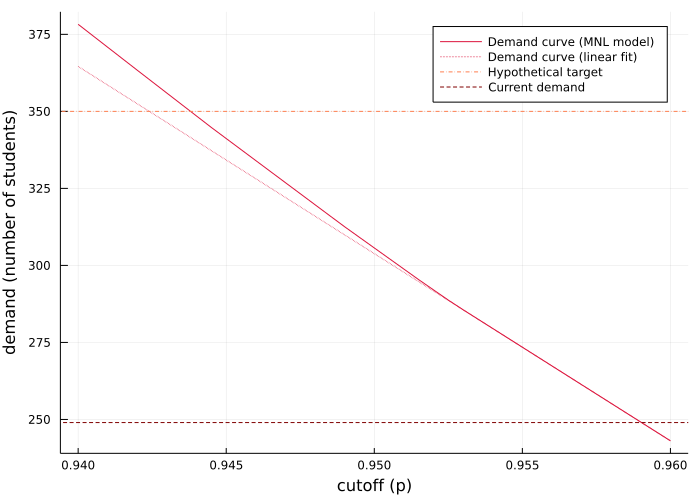

In [11]:
function plot_caltech(cuts, curves)
    pl = plot(xlabel="cutoff (p)", ylabel="demand (number of students)",
              size=(700, 500))
    
    colors = [:crimson, :dodgerblue, :olivedrab, :rebeccapurple]
    
    c = 1
    i = 677
    
    plot!(pl,
          cuts, 
          curves[:, c],
          label="Demand curve (MNL model)",#invopt_results[i, :name],
          color = colors[c])


    plot!(pl, [cuts[1], cuts[end]], b .+ m * [cuts[1], cuts[end]],
      ls=:dot, color = :crimson, label="Demand curve (linear fit)")



    hline!(pl,
        [350],
           ls=:dashdot, c=:coral, label="Hypothetical target")

    hline!(pl,
           [invopt_results[i, :demand]],
           color = :maroon, ls=:dash, label="Current demand")
    
    return pl
end

caltech_plot = plot_caltech(caltech...)

In [12]:
# Target cutoff predicted by my model
b2, m2 = [[1, 1] caltech[1][8:9]] \ caltech[2][8:9]
(350 - b2) / m2

0.9437941480008459

In [13]:
# savefig(allthree_plot, "paper/plots/three-demand-curves.pdf")
# savefig(allthree_plot, "paper/plots/three-demand-curves.png")

# savefig(caltech_plot, "paper/plots/caltech-demand-curve.pdf")
# savefig(caltech_plot, "paper/plots/caltech-demand-curve.png")

## Inverse optimization of school objective functions

Here I apply the approach developed in `SchoolIncentives.ipynb` to determine the parameter $\sigma$ that represents each school's preference for "selectivity" relative to "large class size."

This calculation is $\mathcal{O}(n^3)$, and takes less than a minute.

In [8]:
@time invopt_results[!, :selectivity], invopt_results[!, :selectivity_error] =
    sigmainvopt(america, america_p, verbose=false)

 23.843874 seconds (19.50 M allocations: 43.769 GiB, 11.68% gc time)

(Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  17.175001, 17.175001, 17.375002, 19.325, 19.775, 20.975, 21.175001, 20.775002, 20.875002, 23.425001], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  -7.927418f-6, -5.2511692f-5, -3.3557415f-5, -4.8995018f-5, 2.2828579f-5, -1.8835068f-5, -0.0007265806, 0.001129508, 0.0012217164, 3.582239f-5])

In [12]:
CSV.write("./SchoolIncentives/results.csv", invopt_results)

"./SchoolIncentives/results.csv"

Oh, this is really good. The top schools when you sort by how much they prioritize selectivity are top liberal-arts colleges. Amazing!

In [13]:
choosiest = partialsortperm(invopt_results[!, :selectivity], 1:20, rev=true)
mapcols(parser, invopt_results[choosiest, :])

,name,demand,cutoff,yield,trueyield,preferability,rank,selectivity,selectivity_error
,String,Int64,Float64,Float64,Float64,Float64,Int64,Float32,Float32
1,California Institute of Technology,249,0.959,0.43,0.0081,0.0081,34,23.425,0.0
2,Massachusetts Institute of Technology,1115,0.9515,0.72,0.0305,0.0304,8,21.175,-0.0007
3,U of Chicago,1426,0.949,0.53,0.0371,0.0367,3,20.975,-0.0
4,Yale U,1356,0.9527,0.66,0.0381,0.0381,2,20.875,0.0012
5,Harvard U,1659,0.9526,0.81,0.0465,0.0465,1,20.775,0.0011
6,Princeton U,1285,0.9445,0.65,0.0308,0.03,9,19.775,0.0
7,Harvey Mudd College,217,0.9419,0.34,0.005,0.0048,52,19.325,-0.0
8,Stanford U,1677,0.9307,0.76,0.0321,0.0299,10,17.425,-0.0
9,Washington U in St Louis,1610,0.9364,0.34,0.0336,0.032,7,17.375,-0.0


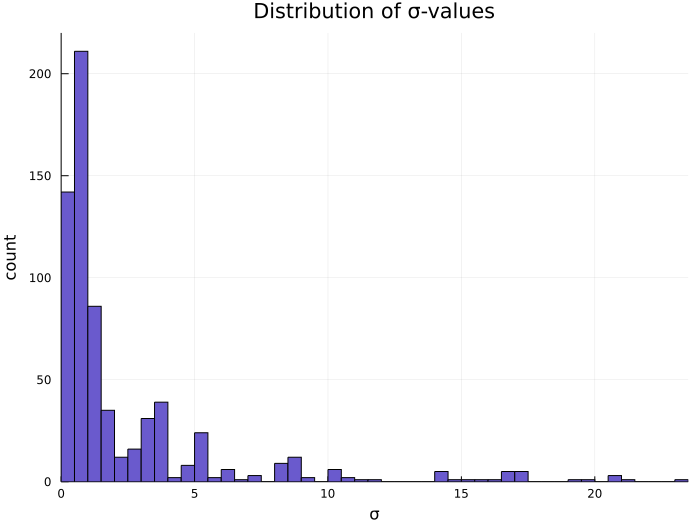

In [14]:
selectivity_hist = plot(size=(700, 530), xlabel="σ", ylabel="count", title="Distribution of σ-values",
                        legend=false, xlim=(0, 23.5), ylim = (0, 220))
histogram!(selectivity_hist, invopt_results[!, :selectivity], bins=0:0.5:24, c=:slateblue)

# savefig(selectivity_hist, "SchoolIncentives/plots/sigma-histogram.pdf")
# savefig(selectivity_hist, "SchoolIncentives/plots/sigma-histogram.png")

selectivity_hist

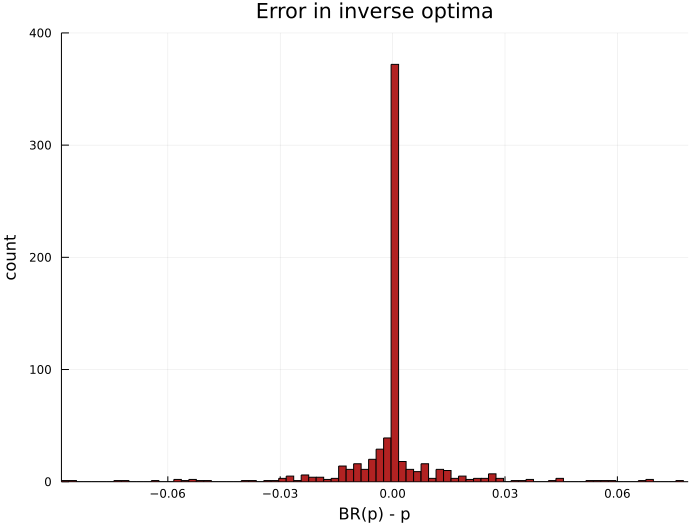

In [18]:
err = invopt_results[!, :selectivity_error]
error_hist = plot(size=(700, 530), xlabel="BR(p) - p", ylabel="count", title="Error in inverse optima",
                        legend=false, ylim=(0, 400), xlim = (minimum(err),maximum(err)))
histogram!(error_hist, err, bins=minimum(err):0.002:maximum(err), c=:firebrick)

savefig(error_hist, "SchoolIncentives/plots/error-histogram.pdf")
savefig(error_hist, "SchoolIncentives/plots/error-histogram.png")

error_hist

In [20]:
findmax(abs.(invopt_results[!, :selectivity_error]))

(0.08840215f0, 572)

In [21]:
errorest = partialsortperm(abs.(err), 1:20, rev=true)
mapcols(parser, invopt_results[errorest, :])

,name,demand,cutoff,yield,trueyield,preferability,rank,selectivity,selectivity_error
,String,Int64,Float64,Float64,Float64,Float64,Int64,Float32,Float32
1,Bentley U,974,0.6002,0.3,0.0032,0.0006,123,3.8188,-0.0884
2,U of Denver,1413,0.5976,0.13,0.0047,0.0009,111,3.8062,-0.0856
3,Cedarville U,781,0.5273,0.32,0.0022,0.0003,150,3.8562,0.0789
4,Loyola U Chicago,2512,0.5292,0.19,0.0071,0.001,108,3.8438,0.0766
5,U of Dallas,380,0.585,0.34,0.0012,0.0002,164,3.8438,-0.0733
6,St Mary's College of Maryland,419,0.5835,0.29,0.0013,0.0002,159,3.8438,-0.0718
7,Willamette U,545,0.5368,0.12,0.0016,0.0002,163,3.8562,0.0694
8,U of Vermont,2495,0.5375,0.14,0.0072,0.0011,106,3.8312,0.0679
9,Elon U,1474,0.5389,0.27,0.0042,0.0006,122,3.8438,0.0668


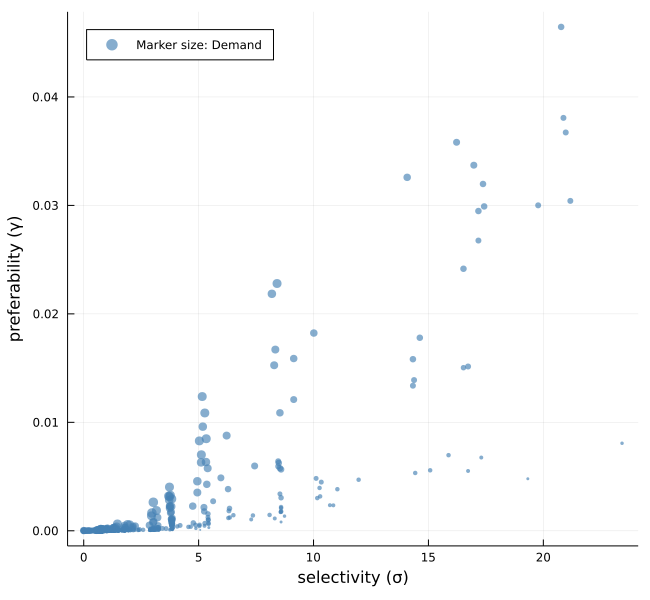

In [22]:
sigma_gamma = plot(size=(650, 600),
                   xlabel="selectivity (σ)", ylabel="preferability (γ)",
                   legend=:topleft)

scatter!(sigma_gamma, invopt_results[!, :selectivity], invopt_results[!, :preferability],
         c=:steelblue, ms=log1p.(invopt_results[!, :demand]/40), ma=0.65, msw=0,
         label="Marker size: Demand")


savefig(sigma_gamma, "SchoolIncentives/plots/sigma-gamma-scatter.pdf")
savefig(sigma_gamma, "SchoolIncentives/plots/sigma-gamma-scatter.png")

sigma_gamma

## Estimating the distribution of $\gamma$ and $\sigma$

A typical assumption in fitting multinomial logit models is that $\hat \delta = \log \gamma$ is normal. In our case, since we have guaranteed that $\sum \gamma_c = 1$, we will work instead with $\delta = \log( |C| \gamma)$. Then we know that the expected value of $ |C| \gamma$ is one, and thus that the mean of the corresponding normal distribution is zero. (I won't bother coding this assumption into the distribution fitting, but rather use it as a check that I did things correctly.)

We want to fit some kind of joint distribution, so it would be nice to get $\sigma$ into the real numbers instead of the nonnegative reals. Again a reasonable choice is for $\sigma$ to be log normal, and thus we will work with $\tau = \log \sigma$ in fitting the distribution.

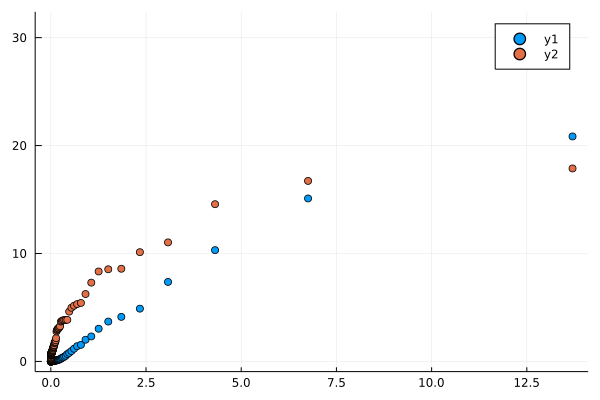

In [110]:
C = size(invopt_results)[1]
n = 100
dist = fit(LogNormal, C*invopt_results[!, :preferability])
scatter(quantile(dist, range(0, 1, length=n+1)), nquantile(C*invopt_results[!, :preferability], n))
scatter!(quantile(dist, range(0, 1, length=n+1)), nquantile(invopt_results[!, :selectivity], n))

An issue occurs when trying to fit the parameters, however, because there are some schools for which $\sigma_c =0 $ exactly. This is a zero-probability event in the log-normal distribution, and any distribution whose support is the positive reals. Below I clip the zero values to the smallest possible `Float32`, but this is kind of hacky.

In [108]:
delta = log.(max.(floatmin(Float32), C * invopt_results[!, :preferability]))
tau = log.(max.(floatmin(Float32), invopt_results[!, :selectivity]))

677-element Vector{Float64}:
 -87.3365447505531
 -87.3365447505531
 -87.3365447505531
 -87.3365447505531
 -87.3365447505531
 -87.3365447505531
 -87.3365447505531
 -87.3365447505531
 -87.3365447505531
 -87.3365447505531
 -87.3365447505531
 -87.3365447505531
 -87.3365447505531
   ⋮
   2.8507065593072
   2.8579060140353953
   2.8434548963325743
   2.8434548963325743
   2.855032506558763
   2.9613995944734857
   2.9844185136537176
   3.04333125235327
   3.052821287763619
   3.033750437011062
   3.038552366545298
   3.1538038708139196

In [109]:
fit_mle(MvNormal, [delta tau]')

FullNormal(
dim: 2
μ: [-3.4172374881858327, -5.498914636065737]
Σ: [6.719187073312183 18.88849746572238; 18.88849746572238 467.09121511940214]
)
